# Supervised Machine Learning

In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. 
This is a simple linear regression task as it involves just two variables.


## Importing Relevant Libraries

In [373]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Importing the Dataset

In [374]:
path="http://bit.ly/w-data"
data=pd.read_csv(path)

### Overview Of Dataset

In [375]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [376]:
print(data.dtypes)

Hours     float64
Scores      int64
dtype: object


In [377]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [378]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [379]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [380]:
missing_data = data.isnull()
missing_data.head(5)

,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False


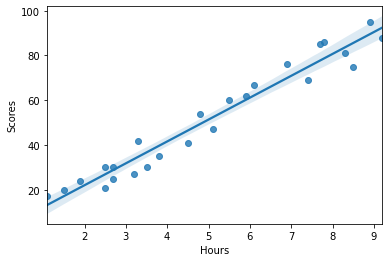

In [381]:
import seaborn as sns
ax = sns.regplot(x='Hours', y='Scores', data=data)

### Training and Testing

#### Now we randomly split our data into training and testing data using the function train_test_split.



In [382]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=0)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 8
number of training samples: 17


#### Let's import LinearRegression from the module linear_model.

In [383]:
from sklearn.linear_model import LinearRegression

In [384]:
#We create a Linear Regression object:
lre=LinearRegression()

In [385]:
#we fit the model using the feature hours
lre.fit(x_train[['Hours']], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [386]:
#Let's Calculate the R^2 on the test data:
lre.score(x_test[['Hours']], y_test)

0.9568211104435257

In [387]:
#Let's Calculate the R^2 onthe train data.
lre.score(x_train[['Hours']], y_train)

0.9484997422695115

### Cross-validation Score

In [388]:
from sklearn.model_selection import cross_val_score

In [389]:
Rcross = cross_val_score(lre, x_data[['Hours']], y_data)
Rcross

array([0.78626426, 0.97891923, 0.93182467, 0.96604831, 0.9273292 ])

In [390]:
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

The mean of the folds are 0.9180771341891051 and the standard deviation is 0.06877822891279663


In [391]:
from sklearn.model_selection import cross_val_predict

In [392]:
yhat = cross_val_predict(lre,x_data[['Hours']], y_data,cv=4)
yhat[0:5]

array([28.30481452, 54.38888889, 35.32744992, 88.4988323 , 38.33715081])

### Model Selection

In [393]:
lr = LinearRegression()
lr.fit(x_train[['Hours']], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [394]:
yhat_train = lr.predict(x_train[['Hours']])
yhat_train[0:5]

array([69.91192552, 13.13823874, 52.29250548, 77.74277887, 34.67308545])

In [395]:
yhat_test = lr.predict(x_test[['Hours']])
yhat_test[0:5]

array([17.05366541, 33.69422878, 74.80620886, 26.8422321 , 60.12335883])

In [396]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [397]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 8
    height = 6
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel("Hours")
    plt.ylabel('Scores')

    plt.show()
    plt.close()

In [398]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 8
    height = 6
    plt.figure(figsize=(width, height))
    
    

    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Hours')
    plt.legend()

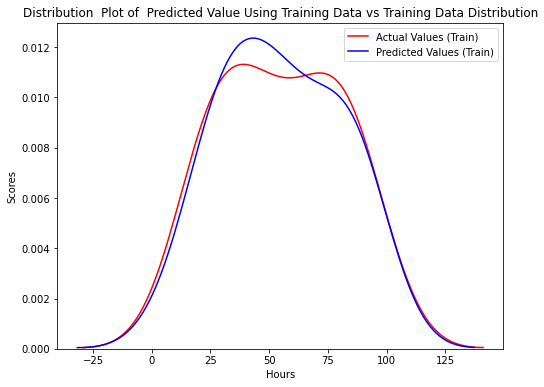

In [399]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

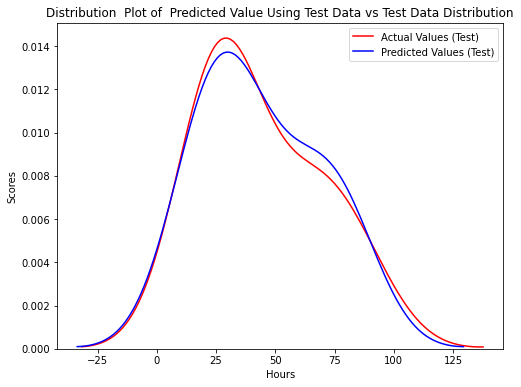

In [400]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Test Data Distribution'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

### Ridge regression

In [401]:
from sklearn.linear_model import Ridge

model=Ridge(alpha=1,random_state=0)
model.fit(x_train,y_train)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=0, solver='auto', tol=0.001)

In [402]:
predictions=model.predict(X_valid)

In [403]:
check=pd.DataFrame({'Actual':y_valid,'Predicted':predictions})
check['Deviation']=abs(check['Actual']-check['Predicted'])
check

,Actual,Predicted,Deviation
5,20,17.416242,2.583758
2,27,33.897558,6.897558
19,69,74.616104,5.616104
16,30,27.111134,2.888866
11,62,60.073766,1.926234


Text(0.5, 1.0, 'Deviation In Actual v/s Predicted Values(Ridge)')

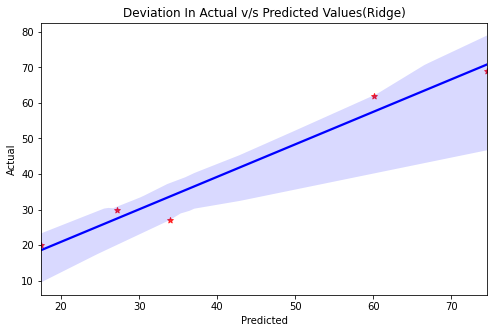

In [404]:
plt.figure(figsize=(8,5))
sns.regplot('Predicted','Actual',data=check,line_kws={'color':'blue'},scatter_kws={'color':'red'},marker='*')
plt.title('Deviation In Actual v/s Predicted Values(Ridge)')

In [405]:
n=float(input())
result=model.predict([[n]])
print("After studying for {} hours, The Expected Score Should be {}".format(n,result.round(2)))

9.25
After studying for 9.25 hours, The Expected Score Should be [92.55]
